## 1. DATA MANIPULATIONS

### 1.1. In our case, two manipulations should be made to datesets.

    1. In all of the datasets, there are one redundant data at the most left side per row. Looks like these are some 
    kind of 'id' features, but in our case we don't need them. So first thing, we need to get rid of these.
    2. In datatest2, there are lack of double quotes (") around the 'date' column. To use our data efficiently, we 
    need to add them.

In [142]:
lines = []
#First, we need to read the txt file. Then get every line of the file into an array: lines.
with open('/home/emremrah/Desktop/DataMin/Project1/datatraining.txt', 'r') as file:
    lines = file.readlines()
    
new_lines = []
#Copy the 'header' row first.
new_lines.append(lines[0])
# Then, to copy each row, after split them by comma, we skip the most left data, and copy rest of it.
for line in lines[1:]:
    new_lines.append(','.join(l for l in line.split(',')[1:]))

# Then write our new data into a CSV file.
with open('/home/emremrah/Desktop/DataMin/Project1/datatraining.csv', 'w') as file:
    file.writelines(new_lines)
    
################################################################################
    
with open('/home/emremrah/Desktop/DataMin/Project1/datatest.txt', 'r') as file:
    lines = file.readlines()
    
new_lines = []
new_lines.append(lines[0])
for line in lines[1:]:
    new_lines.append(','.join(l for l in line.split(',')[1:]))
    
with open('/home/emremrah/Desktop/DataMin/Project1/datatest.csv', 'w') as file:
    file.writelines(new_lines)

################################################################################
    
with open('/home/emremrah/Desktop/DataMin/Project1/datatest2.txt', 'r') as file:
    lines = file.readlines()
    
new_lines = []
new_lines.append(lines[0])
# Here, we will add the quotes around the 'date' column.
for line in lines[1:]:
    i = line.index(',') + 1
    i2 = line[i:].index(',')
    line = line[:i] + '"' + line[i:i+i2] + '"' + line[i+i2:]
    new_lines.append(','.join(l for l in line.split(',')[1:]))
    
with open('/home/emremrah/Desktop/DataMin/Project1/datatest2.csv', 'w') as file:
    file.writelines(new_lines)

#### After this, we can get our data to a pandas dataframe.

In [143]:
import pandas as pd
import numpy as np
import sklearn

path = "/home/emremrah/Desktop/DataMin/Project1/datatraining.csv"
train = pd.read_csv(path)
path = "/home/emremrah/Desktop/DataMin/Project1/datatest.csv"
test = pd.read_csv(path)
path = "/home/emremrah/Desktop/DataMin/Project1/datatest2.csv"
test2 = pd.read_csv(path)

#### Now, let's take a look to our data.

In [144]:
print("Training set:\n{}".format(train.head()))
# print("\nTest set #1:\n{}".format(test.head()))
# print("\nTest set #2:\n{}".format(test2.head()))
print("\nKeys of TRAINING data:\n{}".format(train.keys()))
print("\nKeys of TEST1 data:\n{}".format(test.keys()))
print("\nKeys of TEST2 data:\n{}".format(test.keys()))

Training set:
                  date  Temperature  Humidity  Light     CO2  HumidityRatio  \
0  2015-02-04 17:51:00        23.18   27.2720  426.0  721.25       0.004793   
1  2015-02-04 17:51:59        23.15   27.2675  429.5  714.00       0.004783   
2  2015-02-04 17:53:00        23.15   27.2450  426.0  713.50       0.004779   
3  2015-02-04 17:54:00        23.15   27.2000  426.0  708.25       0.004772   
4  2015-02-04 17:55:00        23.10   27.2000  426.0  704.50       0.004757   

   Occupancy  
0          1  
1          1  
2          1  
3          1  
4          1  

Keys of TRAINING data:
Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

Keys of TEST1 data:
Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')

Keys of TEST2 data:
Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')


#### As you can see, all of them have the same struct. After some time, we are going to drop the 'Occupancy' column from training set, and drop all features except 'Occupancy' column from test1 and test2 sets to first train then test our models.

### 1.2. After that, here is another struggle, the date feature can't be processed by our algorithms right now.

    So, I want to change the date to a 'Weekday' feature. By doing that, from monday to sunday, each day will
    correspond to an integer number from 0 to 6. Which can be used by our algorithms.
    
    To do that I use datetime.strptime function to get weekday from our preprocessed 'date' data.
    
##### Also, I want to use the date data more:
    
    It would be unefficient if I get a "Season" feature from "date", because whatever the season is, work hours won't be changed. People always be at work at the same hours everyday.
    
    So as we saying "Hours", "Occupancy" may be changed during hours in a day due to 'lunchtime', or 'office hours'. So I want to add a 'Weekday' and a 'Hour' feature by using datetime.

In [145]:
import datetime

train["H"] = train["date"]
test["H"] = test["date"]
test2["H"] = test2["date"]

def ch(st):
    return datetime.datetime.strptime(st, '%Y-%m-%d %H:%M:%S').hour

def dt(st):
    return datetime.datetime.strptime(st, '%Y-%m-%d %H:%M:%S').weekday()

for i, dd in enumerate(train['date']):
    train.iloc[i, train.columns.get_loc('H')] = ch(train['date'].iloc[i])
    train.iloc[i, train.columns.get_loc('date')] = dt(train['date'].iloc[i])
    
for i, dd in enumerate(test['date']):
    test.iloc[i, test.columns.get_loc('H')] = ch(test['date'].iloc[i])
    test.iloc[i, test.columns.get_loc('date')] = dt(test['date'].iloc[i])
    
for i, dd in enumerate(test2['date']):
    test2.iloc[i, test2.columns.get_loc('H')] = ch(test2['date'].iloc[i])
    test2.iloc[i, test2.columns.get_loc('date')] = dt(test2['date'].iloc[i])

#### Now our 'date' column consists weekdays as 'date' from 0 to 6 and hours as 'H' from 0 to 23. 

In [146]:
print("Training set:\n{}".format(train.head()))

Training set:
   date  Temperature  Humidity  Light     CO2  HumidityRatio  Occupancy   H
0     2        23.18   27.2720  426.0  721.25       0.004793          1  17
1     2        23.15   27.2675  429.5  714.00       0.004783          1  17
2     2        23.15   27.2450  426.0  713.50       0.004779          1  17
3     2        23.15   27.2000  426.0  708.25       0.004772          1  17
4     2        23.10   27.2000  426.0  704.50       0.004757          1  17


## 2. CLOSE LOOK TO DATASET

#### After preparing our data to proceed, we will take a close look to understand what we have.

### 2.1. Understanding the data

#### Lets take a look to our data's shape:

In [147]:
print("\nTrain shape: {}".format(train.shape))
print("\nTest1 shape: {}".format(test.shape))
print("\nTest2 shape: {}".format(test2.shape))


Train shape: (8143, 8)

Test1 shape: (2665, 8)

Test2 shape: (9752, 8)


#### As seen, since our data already has splitted, we don't need to split it again.
    
#### Several things should be made right now:
    
    In all of data, we are going to split them to x and y (input-output).
    
    Since 'Occupancy' isn't a feature, it's our output that we want to predict, we must seperate it from X (input)
    sets; we only want it in the y (output) sets. If we don't do that, models will suppose 'Occupancy' is a feature,
    but it's not.
    

In [149]:
target = train["Occupancy"].values
target2 = test["Occupancy"].values
target3 = test2["Occupancy"].values

xtrain = train;
del xtrain["Occupancy"]
ytrain = target

xtest = test;
del xtest["Occupancy"]
ytest = target2

xtest2 = test2;
del xtest2["Occupancy"]
ytest2 = target3

KeyError: 'Occupancy'

#### Here we made it. Now all train data have features except 'Occupancy', and all test data have only 'Occupancy'.

In [68]:
print("xtrain shape: {}\n".format(xtrain.shape))
print("ytrain shape: {}\n".format(ytrain.shape))
print("ytrain: {}\n".format(ytrain))

xtrain shape: (8143, 7)

ytrain shape: (8143,)

ytrain: [1 1 1 ..., 1 1 1]



### From now, we have the basic tools properly: inputs and outputs, features ect.

    Now before we make an actual model, it's would be nice to look at our data visually. The simplest way to do this
    is plotting the data.

In [69]:
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
import mglearn
%matplotlib inline

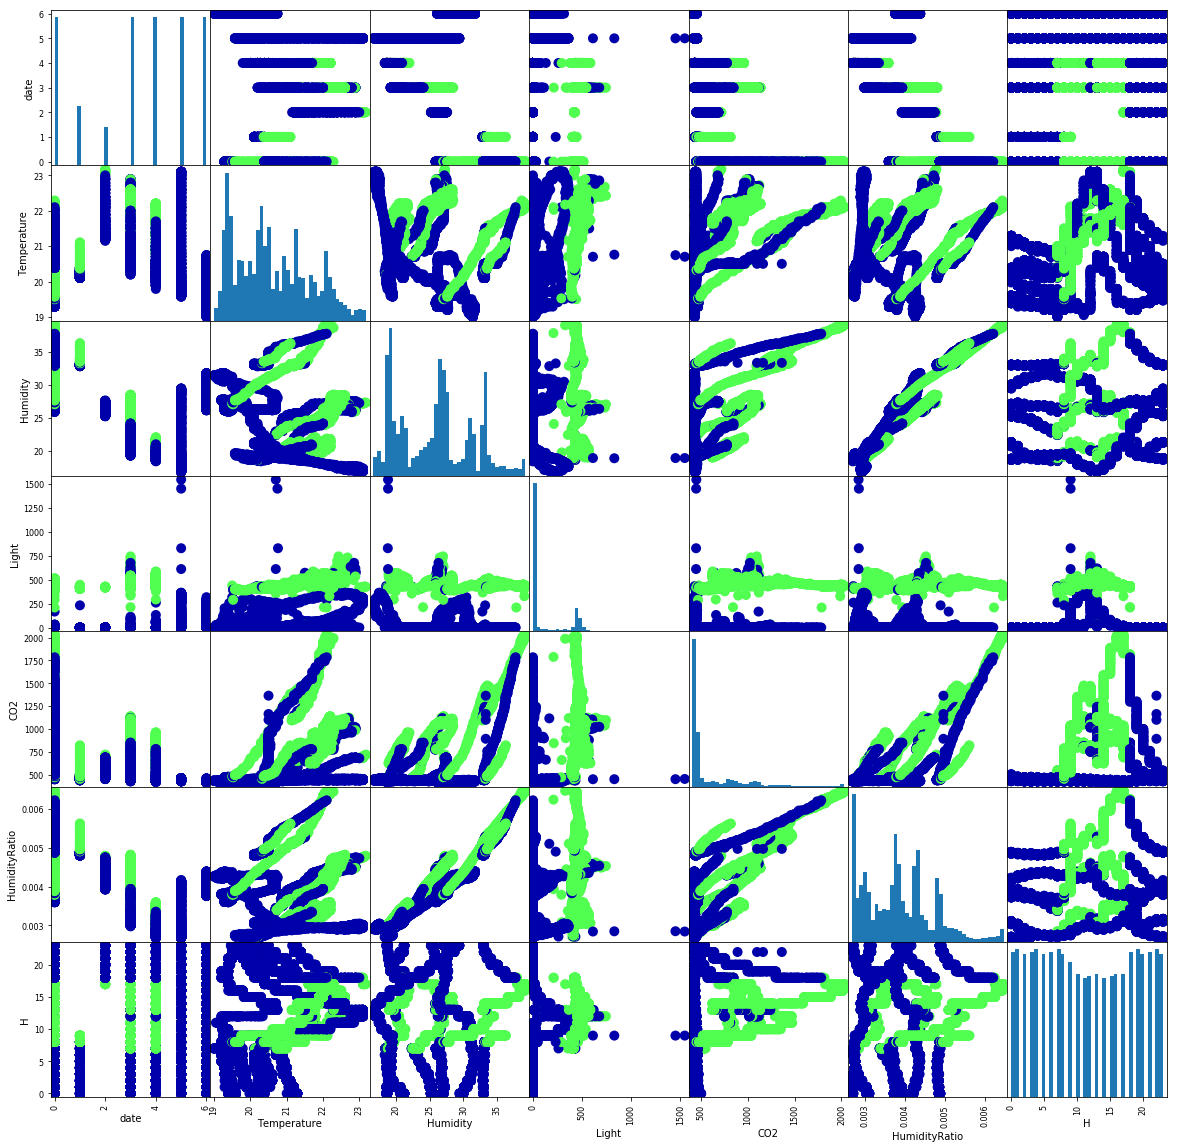

In [11]:
dataframe = pd.DataFrame(xtrain, columns=xtrain)
pd.plotting.scatter_matrix(xtrain, c = ytrain, figsize = (20,20), marker='o', 
                           hist_kwds={'bins': 40}, s=100, alpha=1, cmap=mglearn.cm3)
plt.show()

As we can see, the most efficient features are 'Light' and 'CO2' due to these features gives us distinct informations and they are not too much collerated.

Besides, there is a few combinations that really bad, like: Hour and Temperature. This information gives us that temperature can't give us distinct information about Occupancy in the hours of a day. So we say this features are 'collerated'.

Also, Humidity (btw Humidity is revelant with Temperature) and Hour pair is the worst, too.

But we can use Hour feature to get more accuracy with Weekday feature.

## 3. APPLYING ALGORITHMS

### Now we can consider fit a model. As a simple algorithm, KNearestNeighbor is the best choice to warm-up.

### 3.1. KNeighborsClassifier

In [71]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = 1
knn = KNeighborsClassifier(n_neighbors=neighbors)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

Now, we fitted our xtrain and ytrain set to knn model. Fitting means, the algorithm took inputs from xtrain, and learned "which feature value gives which output?"

#### And at last, now we will going to see our model's score among train sets:

In [72]:
print("KNN TRAIN score with " + str(neighbors) +" neighbors: {}".format(knn.score(xtrain, ytrain)))

KNN TRAIN score with 1 neighbors: 1.0


#### Here we go, our model gives %100 accuracy the training set!

#### Now that we have an issue, overfit, means: our model is so complex that gives too high accuracy on the training data while giving not so high on the test data. So, to see if we got overfitness, let's take a look out test score:

In [73]:
print("KNN TEST1 score with " + str(neighbors) +" neighbors: {}".format(knn.score(xtest, ytest)))
print("KNN TEST2 score with " + str(neighbors) +" neighbors: {}".format(knn.score(xtest2, ytest2)))

KNN TEST1 score with 1 neighbors: 0.9369606003752345
KNN TEST2 score with 1 neighbors: 0.950369155045119


#### As we mentioned, our test accuracy is nearly %4 and %7 less than train accuracy. %4 is acceptable though, but this much difference means we got overfitted.

As you may noticed, there is a parameter in KNN named "n_neighbors". This parameters determines how many neighbors will be checked up in the KNN model. We can use this parameter to get bettter accuracy.

I've tried some different neighbors and got some better accuracies. Now I am going to show the differences in a loop and with a chart:

#### Since we have over thousands of data, neighbors don't have to be around 10. So we are going to hit 100 neighbors!

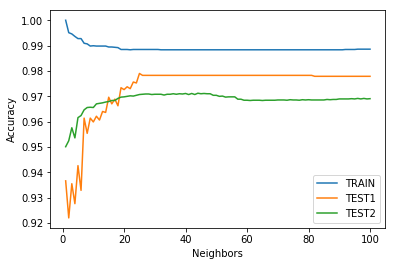

In [15]:
set_neighbors = range(1, 101)
train_acc = []
test1_acc = []
test2_acc = []

for n in set_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(xtrain, ytrain)
    train_acc.append(knn.score(xtrain, ytrain))
    test1_acc.append(knn.score(xtest, ytest))
    test2_acc.append(knn.score(xtest2, ytest2))
    
plt.plot(set_neighbors, train_acc, label="TRAIN")
plt.plot(set_neighbors, test1_acc, label="TEST1")
plt.plot(set_neighbors, test2_acc, label="TEST2")
plt.ylabel("Accuracy")
plt.xlabel("Neighbors")
plt.legend()
plt.show()

#### But still, it's clear that there is no improvement (actually, there is downgrade) after a point around 25-30 neighbors. But this may change with different features.

### 3.2. Feature Engineering

    Changing model parameters is a way to improve the accuracy, feature engineering is also a good way to do it.
    
#### Acually we did it in the beginning, by adding Hour feature and changing the date to weekday.
    
    Now we are going to engine more features. Then, during applying other algorithms, we are not going to have too much
    chit-chat as now, just give the score and little bit explanations.

#### First thing that I am going to do with features is multiplying the Light and Humidity features.

F1 means engined feature #1

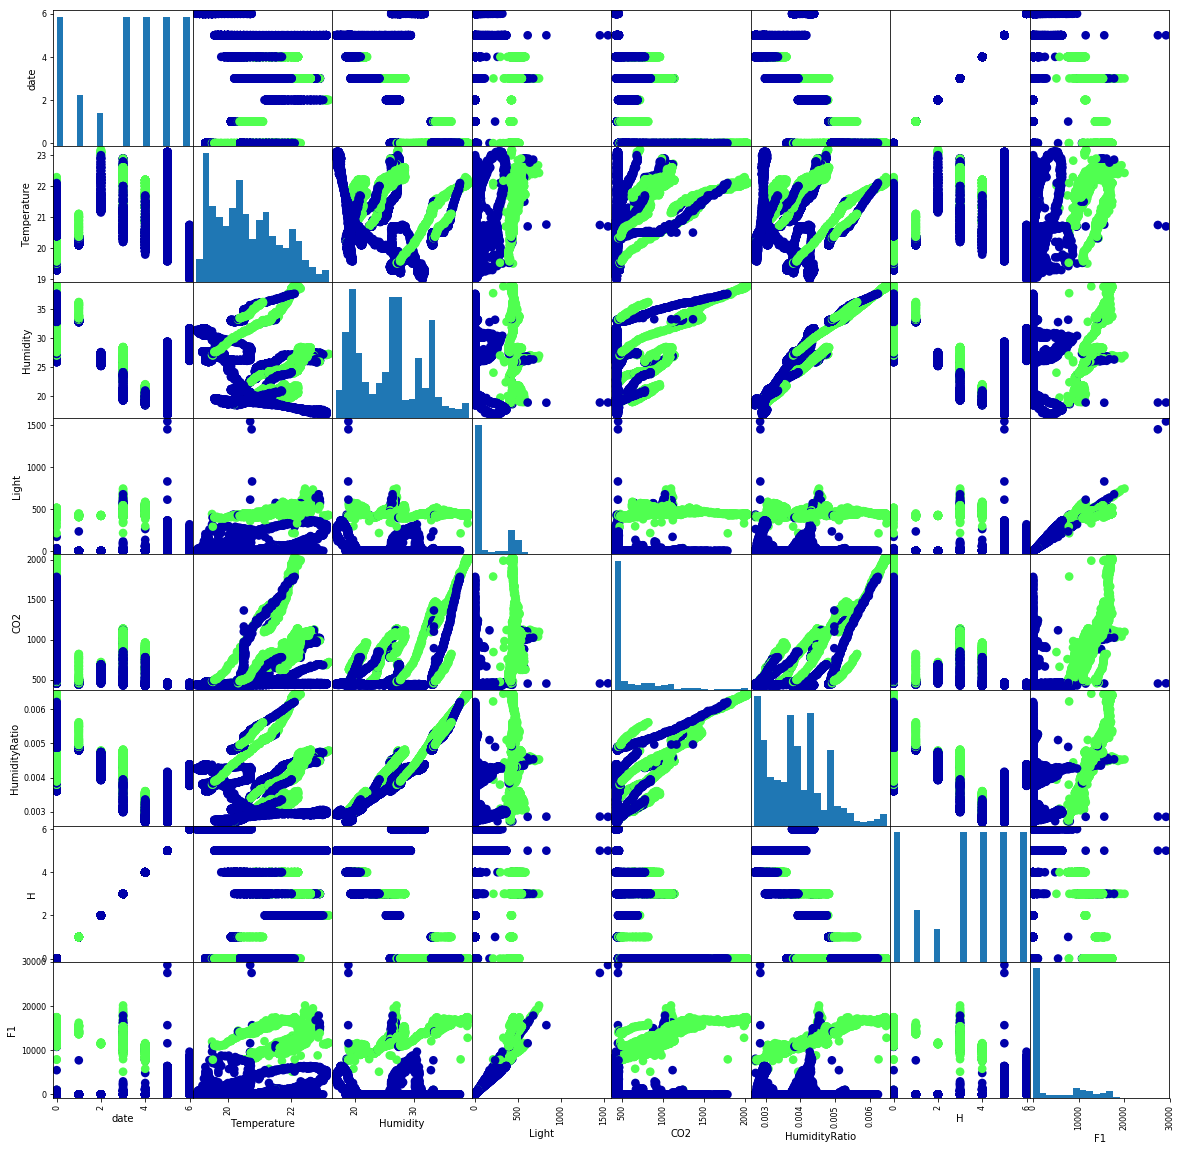

In [74]:
xtrain_f1 = train
xtest_f1 = test
xtest2_f1 = test2

xtrain_f1["F1"] = xtrain_f1["Humidity"] * xtrain_f1["Light"]

xtest_f1["F1"] = xtest_f1["Humidity"] * xtest_f1["Light"]

xtest2_f1["F1"] = xtest2_f1["Humidity"] * xtest2_f1["Light"]

first_dataframe = pd.DataFrame(xtrain_f1, columns=xtrain_f1)
pd.plotting.scatter_matrix(xtrain_f1, c = ytrain, figsize = (20,20), marker='o', 
                           hist_kwds={'bins': 20}, s=75, alpha=1, cmap=mglearn.cm3)
plt.show()

#### Before giving the score, let's remember previous (with only weekday and hour) score with 20 neighbors:

In [17]:
n = 20
knn = KNeighborsClassifier(n_neighbors=n)
knn.fit(xtrain, ytrain)

print("KNN TRAIN score with " + str(n) +" neighbors: {}".format(knn.score(xtrain, ytrain)))
print("KNN TEST1 score with " + str(n) +" neighbors: {}".format(knn.score(xtest, ytest)))
print("KNN TEST2 score with " + str(n) +" neighbors: {}".format(knn.score(xtest2, ytest2)))

KNN TRAIN score with 20 neighbors: 0.9871054893773793
KNN TEST1 score with 20 neighbors: 0.9782363977485928
KNN TEST2 score with 20 neighbors: 0.9846185397867104


#### Now let's see score with F1:

In [18]:
knn = KNeighborsClassifier(n_neighbors=n)
knn.fit(xtrain_f1, ytrain)

print("KNN TRAIN score with " + str(n) +" neighbors: {}".format(knn.score(xtrain_f1, ytrain)))
print("KNN TEST1 score with " + str(n) +" neighbors: {}".format(knn.score(xtest_f1, ytest)))
print("KNN TEST2 score with " + str(n) +" neighbors: {}".format(knn.score(xtest2_f1, ytest2)))

KNN TRAIN score with 20 neighbors: 0.9871054893773793
KNN TEST1 score with 20 neighbors: 0.9782363977485928
KNN TEST2 score with 20 neighbors: 0.9846185397867104


#### And there is a chart with F1 feature:

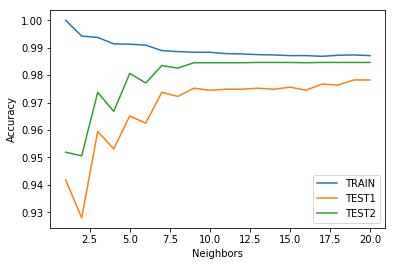

In [19]:
set_neighbors = range(1, 21)
train_acc = []
test1_acc = []
test2_acc = []

for n in set_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(xtrain_f1, ytrain)
    train_acc.append(knn.score(xtrain_f1, ytrain))
    test1_acc.append(knn.score(xtest_f1, ytest))
    test2_acc.append(knn.score(xtest2_f1, ytest2))
    
plt.plot(set_neighbors, train_acc, label="TRAIN")
plt.plot(set_neighbors, test1_acc, label="TEST1")
plt.plot(set_neighbors, test2_acc, label="TEST2")
plt.ylabel("Accuracy")
plt.xlabel("Neighbors")
plt.legend()
plt.show()

#### Now, we are going to engine another feature.

    I want to add a feature that weekday and hours are concatenated, like on Wednesday at 3 PM: 215

In [23]:
xtrain_f2 = xtrain_f1
xtest_f2 = xtest_f1
xtest2_f2 = xtest2_f1

xtrain_f2["F2"] = xtrain_f2["date"].map(str) + xtrain_f2["H"].map(str)

xtest_f2["F2"] = xtest_f2["date"].map(str) + xtest_f2["H"].map(str)

xtest2_f2["F2"] = xtest2_f2["date"].map(str) + xtest2_f2["H"].map(str)


knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(xtrain_f2, ytrain)

print("KNN TRAIN score with " + str(n) +" neighbors: {}".format(knn.score(xtrain_f2, ytrain)))
print("KNN TEST1 score with " + str(n) +" neighbors: {}".format(knn.score(xtest_f2, ytest)))
print("KNN TEST2 score with " + str(n) +" neighbors: {}".format(knn.score(xtest2_f2, ytest2)))

KNN TRAIN score with 20 neighbors: 0.98808792828196
KNN TEST1 score with 20 neighbors: 0.9789868667917448
KNN TEST2 score with 20 neighbors: 0.9803117309269893


#### And here is chart with F2 feature:

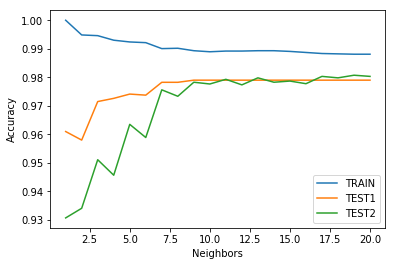

In [24]:
set_neighbors = range(1, 21)
train_acc = []
test1_acc = []
test2_acc = []

for n in set_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(xtrain_f2, ytrain)
    train_acc.append(knn.score(xtrain_f2, ytrain))
    test1_acc.append(knn.score(xtest_f2, ytest))
    test2_acc.append(knn.score(xtest2_f2, ytest2))
    
plt.plot(set_neighbors, train_acc, label="TRAIN")
plt.plot(set_neighbors, test1_acc, label="TEST1")
plt.plot(set_neighbors, test2_acc, label="TEST2")
plt.ylabel("Accuracy")
plt.xlabel("Neighbors")
plt.legend()
plt.show()

#### And for last, here is F2 feature's success from 0 to 20 neighbors.

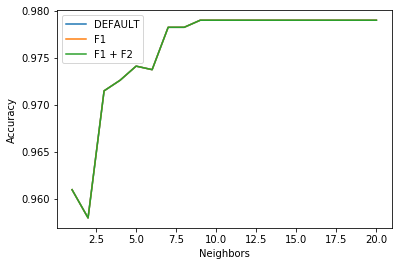

In [25]:
set_neighbors = range(1, 21)
nof_acc = []
f1_acc = []
f2_acc = []

for n in set_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(xtrain, ytrain)
    nof_acc.append(knn.score(xtest, ytest))

for n in set_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(xtrain_f1, ytrain)
    f1_acc.append(knn.score(xtest_f1, ytest))
    
for n in set_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(xtrain_f2, ytrain)
    f2_acc.append(knn.score(xtest_f2, ytest))
    
plt.plot(set_neighbors, nof_acc, label="DEFAULT")
plt.plot(set_neighbors, f1_acc, label="F1")
plt.plot(set_neighbors, f2_acc, label="F1 + F2")
plt.ylabel("Accuracy")
plt.xlabel("Neighbors")
plt.legend()
plt.show()

### 3.3. Linear Models

### It would be nice if we have some talk about Linear Models, I will just pass some basic characteristics about this algorithm:

    - Linear models makes predictions using linear functions, as we saw at highschool in the past years.[1]
    - Prediction is a line for a single feature, a plane for two, or a hyperplane for higher dimensions (when using 
    many features.[1]
    - For datasets with many features, linear methods can be very powerful.[1]
    
    There is Linear Regression models and it's derivations called Ridge (L2) and Lasso (L1). But since our problem is classification, we just skip them and pass trough Linear Classification.
    
[1]

### 3.3.1. Linear Classification

In [180]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

logreg = LogisticRegression().fit(xtrain, ytrain)
print("Training set score: {:.3f}".format(logreg.score(xtrain, ytrain)))
print("Test set score: {:.3f}".format(logreg.score(xtest, ytest)))

Training set score: 0.988
Test set score: 0.979


In [192]:
logreg = LogisticRegression(C=1).fit(xtrain_f2, ytrain)
print("Training set score: {:.3f}".format(logreg.score(xtrain_f2, ytrain)))
print("Test set score: {:.3f}".format(logreg.score(xtest2_f2, ytest2)))

Training set score: 0.988
Test set score: 0.980


In [197]:
logreg100 = LogisticRegression(C=100).fit(xtrain_f2, ytrain)
print("Training set score: {:.3f}".format(logreg100.score(xtrain_f2, ytrain)))
print("Test set score: {:.3f}".format(logreg100.score(xtest2_f2, ytest2)))

Training set score: 0.988
Test set score: 0.980


In [204]:
logreg001 = LogisticRegression(C=0.001).fit(xtrain_f2, ytrain)
print("Training set score: {:.3f}".format(logreg001.score(xtrain_f2, ytrain)))
print("Test set score: {:.3f}".format(logreg001.score(xtest2_f2, ytest2)))

Training set score: 0.988
Test set score: 0.981


In [233]:
logreg001.coef_.T

array([[ -3.27867654e-02],
       [ -1.59375781e-01],
       [ -1.82401300e-01],
       [  1.08451774e-02],
       [  4.72413576e-03],
       [ -2.70297045e-05],
       [  9.17368907e-04],
       [  2.81888920e-04],
       [ -5.79927090e-03]])

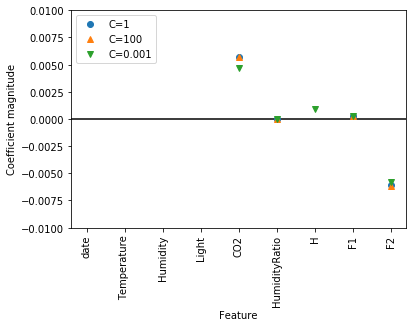

In [237]:
f2_features = ['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'H', 'F1', 'F2']

plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(9), f2_features, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-0.01, 0.01)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()